## Jupyter tutorial: Open Source GIS in Python

Jim, GISC 6317

Last updated: 11/05/2023

Purpose: Jupyter tutorial that includes how to intall 'GDAL', and learn how to use 'fiona' and 'rasterio'.

## Opening a shapefile in Fiona

In [ ]:
import fiona

In [15]:
miairports = fiona.open("/Users/jimpan/Documents/EPPS 6317/Labs/lab9/mi_airports_shp/mi_airports.shp")
miairports

<open Collection '/Users/jimpan/Documents/EPPS 6317/Labs/lab9/mi_airports_shp/mi_airports.shp:mi_airports', mode 'r' at 0x122edeab0>

In [24]:
# Get first feature
f = miairports.next()
# What geometry type is it?
f['geometry']['type']

/var/folders/m3/k788kw6103zdvc0bwpc1lzd00000gn/T/ipykernel_69859/1394809352.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  f = miairports.next()


'Point'

In [26]:
# Count features
num_features = len(miairports)
num_features

539

In [17]:
# Get the shapefile extent
miairports.bounds

(183056.125, 132988.953125, 788825.6875, 738138.0625)

In [18]:
miairports.schema

{'properties': {'ID': 'int:11',
  'NAME': 'str:63',
  'TYPE': 'str:9',
  'COUNTY': 'str:14',
  'FIPS': 'int:11',
  'Y_COR': 'int:11',
  'X_COR': 'int:11',
  'ELEVATION': 'int:11',
  'LOCATION': 'str:29'},
 'geometry': 'Point'}

In [19]:
# Use shapefile properties in conditional logic
if miairports.schema['geometry'] == 'Point':
    print("This is a point file")
elif miairports.schema['geometry'] == 'LineString' or miairports.schema['geometry'] == 'MultiLineString':
    print("This is a line file")
elif miairports.schema['geometry'] == 'Polygon' or miairports.schema['geometry'] == 'MultiPolygon':
    print("This is a polygon file")
else:
    print("I don't know *what* this is!")

This is a point file


In [31]:
# Identify the number of airports in Ingham county

# List comprehension to filter airports in Ingham county
airports_in_ingham = []

for airport in miairports:
    # Iterate through each 'airport' feature in the miairports dataset
    if airport['properties']['COUNTY'] == 'Ingham':
        # Check if the 'COUNTY' property of the current airport is 'Ingham'
        airports_in_ingham.append(airport)
        # If 'COUNTY' is 'Ingham', add the airport to the 'airports_in_ingham' list

# The 'airports_in_ingham' list will contain all airports in 'Ingham' county

num_airports_in_ingham = len(airports_in_ingham)
num_airports_in_ingham

10

In [38]:
# Find the airport with the highest elevation
elevation_sorted = sorted(miairports, key=lambda x: x['properties']['ELEVATION'], reverse=True)
elevation_sorted

# Loop through sorted airports by elevation in descending order
for airport in elevation_sorted:
    airport_name = airport['properties']['NAME']
    airport_elevation = airport['properties']['ELEVATION']
    print(f"The airport '{airport_name}' has an elevation of {airport_elevation} feet.")


The airport 'Marenisco Landing Field' has an elevation of 1638 feet.
The airport 'Northwoods Center Conference Airport' has an elevation of 1633 feet.
The airport 'NRC Airport' has an elevation of 1625 feet.
The airport 'Stambaugh Airport' has an elevation of 1622 feet.
The airport 'Hide-Away Village Landing Strip' has an elevation of 1525 feet.
The airport 'Edward F Johnson Airport' has an elevation of 1446 feet.
The airport 'Marquette County Airport' has an elevation of 1419 feet.
The airport 'Huber Airport' has an elevation of 1418 feet.
The airport 'Prickett-Grooms Field' has an elevation of 1372 feet.
The airport 'Prickett Grooms Airport' has an elevation of 1361 feet.
The airport 'Iron County Airport' has an elevation of 1340 feet.
The airport 'Otsego County Airport' has an elevation of 1328 feet.
The airport 'McQuestions Airport' has an elevation of 1317 feet.
The airport 'Wexford County Airport' has an elevation of 1309 feet.
The airport 'Wexford County Airport' has an elevatio

In [36]:
# Check for the presence of airports in elevation_sorted

if not elevation_sorted: # if len(elevation_sorted) == 0:
    print("No airports found.")
else:
    highest_elevation_airport = elevation_sorted[0]['properties']['NAME']
    highest_elevation = elevation_sorted[0]['properties']['ELEVATION']
    
    print(f"The airport with the highest elevation is {highest_elevation_airport} with an elevation of {highest_elevation} feet.")


The airport with the highest elevation is Marenisco Landing Field with an elevation of 1638 feet.


## Opening Landsat imagery with rasterio

In [ ]:
import rasterio

In [2]:
raster = rasterio.open("LE70220492002106EDC00_stack.gtif")
raster

<open DatasetReader name='LE70220492002106EDC00_stack.gtif' mode='r'>

In [3]:
# Import the show method to display our raster
from rasterio.plot import show

In [5]:
# Read Red (band 3) and Near Infrared (band 4) bands
red = raster.read(3)
nir = raster.read(4)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)
ndvi

array([[0.37269557, 0.39126166, 0.44422984, ..., 0.36966394, 0.40647922,
        0.51700087],
       [0.3250366 , 0.3498452 , 0.3970338 , ..., 0.38437597, 0.39950526,
        0.42797119],
       [0.33222116, 0.3498452 , 0.37306202, ..., 0.37700787, 0.37754792,
        0.415     ],
       ...,
       [0.27515723, 0.27947817, 0.26802586, ..., 0.29664874, 0.32523851,
        0.34447539],
       [0.28249027, 0.28341426, 0.27947817, ..., 0.37880738, 0.36796159,
        0.2972973 ],
       [0.29672006, 0.30234934, 0.28967643, ..., 0.34625551, 0.31332745,
        0.27264015]])

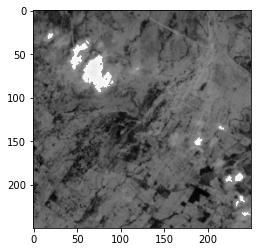

<Axes: >

In [10]:
# Display the NDVI raster plot with a colorbar legend
show(ndvi, cmap='Greys')

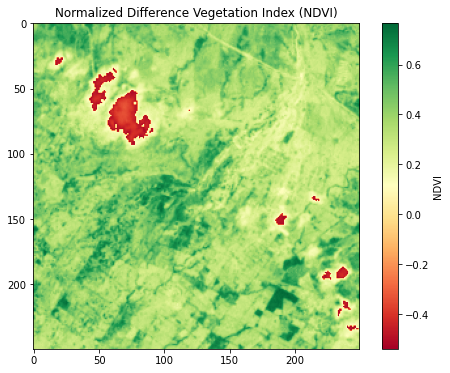

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()